In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import colorcet as cc

In [2]:
df = pd.read_csv("./data/rep_final.csv")
df_nonrep = pd.read_csv("./data/nonrep_final.csv")
df_little = pd.read_csv("./data/NonRep32MiB_final.csv")
id_map = {
    0: "Belazzougui et al.",
    1: "LPF pruned s=1 DP",
    2: "LPF pruned s=1",
    3: "LPF pruned s=1 no cut",
    4: "LPF pruned s=z DP",
    5: "LPF pruned s=z",
    6: "LPF s=z",
    7: "LPF s=1",
    8: "LPF heuristic s=z",
    9: "FP pruned s=1",
    10: "FP pruned s=z",
    11: "FP s=z",
    12: "FP s=1",
    13: "wavelet tree",
}

theodict = [0,11,12,6,7]
theodict_nocomp = [11,12,6,7]
pruneddict = [0,9,10,8,4,5,1,2]
pruneddict_nocomp = [9,10,8,4,5,1,2]
query_nocomp = [2,5,6,7,8]
query = [0,2,5,6,7,8]
all_combinations = {
"FP s=1" + ' vs ' + "LPF s=1" : [12,7],
"FP s=z" + ' vs ' + "LPF s=z" : [11,6],
"LPF s=z" + ' vs ' + "LPF s=1" : [6,7],
"FP s=z" + ' vs ' + id_map[12]  : [11,12],
"LPF pruned s=z DP" + ' vs ' + id_map[5] : [4,5],
"LPF pruned s=1 DP" + ' vs ' + id_map[2]: [1,2],
"LPF pruned s=1" + ' vs ' + id_map[9] : [2,9],
"LPF pruned s=z" + ' vs ' + id_map[10] : [5,10],
"LPF pruned s=1 DP" + ' vs ' + id_map[4] : [1,4],
"LPF pruned s=1" + ' vs ' + id_map[5]: [2,5],
"FP pruned s=1" + ' vs ' + id_map[10] : [9,10],
"COmpetitor" + ' vs ' + id_map[2] : [0,2],
}

# sns.set_font_scale(1.15)
sns.set_theme(context='paper',style='ticks',font_scale=1.4,rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
df = df.groupby(['id','text_id','t','l']).mean().reset_index()
df_nonrep.groupby(['id','text_id','t','l']).mean().reset_index()
col_wrapping = 3
df['name'] = df["id"].replace(id_map)
df['text_id'] = df["text_id"].replace({"/workspace/dmeyer/data/" : ""}, regex=True)
df['bpS'] = df.apply(lambda row: row.treesize/ row.textsize * 8 , axis=1)
df['bpSrs'] = df.apply(lambda row: row.treesize_rs/ row.textsize * 8 , axis=1)
df['constr_time_rs'] = df['constr_time_rs']/1000
df['throughput_rs'] = (df['textsize']/df['constr_time_rs'])/(2**20)
df_nonrep['name'] = df_nonrep["id"].replace(id_map)
df_nonrep['text_id'] = df_nonrep["text_id"].replace({"/workspace/dmeyer/data/" : ""}, regex=True)
df_nonrep['text_id'] = df_nonrep["text_id"].replace({"/workspace/dmeyer/data/" : ""}, regex=True)
df_nonrep['bpS'] = df_nonrep.apply(lambda row: row.treesize/ row.textsize * 8 , axis=1)
df_nonrep['bpSrs'] = df_nonrep.apply(lambda row: row.treesize_rs/ row.textsize * 8 , axis=1)
df_nonrep['constr_time_rs'] = df_nonrep['constr_time_rs']/1000
df_nonrep['throughput_rs'] = (df_nonrep['textsize']/df_nonrep['constr_time_rs'])/(2**20)
df_little['name'] = df_little["id"].replace(id_map)
df_little['text_id'] = df_little["text_id"].replace({"/workspace/dmeyer/data/" : ""}, regex=True)
df_little['text_id'] = df_little["text_id"] + "32MB"
df_little['bpS'] = df_little.apply(lambda row: row.treesize/ row.textsize * 8 , axis=1)
df_little['bpSrs'] = df_little.apply(lambda row: row.treesize_rs/ row.textsize * 8 , axis=1)
df_little['constr_time_rs'] = df_little['constr_time_rs']/1000
df_little['throughput_rs'] = (df_little['textsize']/df_little['constr_time_rs'])/(2**20)

id = df['name'].unique()
texts = df['text_id'].unique()
pal = dict(zip(id, sns.color_palette(cc.glasbey, len(id))))
dfmarkers = dict(zip(id,['o','v','^','<', '>', '8','s','p','*','h','X','P'] ))
# dfmarkers = dict(zip(id,[',','.','1','2', '3', '4','_','x','|','1','2','3'] ))
querylittle = df_little[df_little.id.isin(query)]
queryrep = df[df.id.isin(query)]
querynonrep = df_nonrep[df_nonrep.id.isin(query_nocomp)]
querynonrep = df_nonrep[df_nonrep.id.isin(query_nocomp)]
prunedlittle = df_little[df_little.id.isin(pruneddict)]
theoonly = df[df.id.isin(theodict)]
prunedonly = df[df.id.isin(pruneddict)]
theoonly_nonrep = df_nonrep[df_nonrep.id.isin(theodict)]
theoonly_nonrep_nocomp = df_nonrep[df_nonrep.id.isin(theodict_nocomp)]
prunedonly_nonrep = df_nonrep[df_nonrep.id.isin(pruneddict)]
prunedonly_nonrep_nocomp = df_nonrep[df_nonrep.id.isin(pruneddict_nocomp)]
# theo_only_s_1 = df[df.id.isin(theo_only_s_1_dict)]
# theo_only_s_z = df[df.id.isin(theo_only_s_z_dict)]
# theo_only_lpf = df[df.id.isin(theo_only_lpf_dict)]
# theo_only_fp = df[df.id.isin(theo_only_fp_dict)]
# test_size_diff = theo_only_lpf[['id','text_id','t','l','bpS']]
# lpf_time_diff = theo_only_lpf[['id','text_id','t','l','constr_time']]
# fp_time_diff = theo_only_fp[['id','text_id','t','l','constr_time']]
# lpf_time_diff_rs = theo_only_lpf[['id','text_id','t','l','constr_time_rs']]
# fp_time_diff_rs = theo_only_fp[['id','text_id','t','l','constr_time_rs']]
# test = theo_only_s_1[['id','text_id','t','l','constr_time']]
# testz = theo_only_s_z[['id','text_id','t','l','constr_time']]
nowave = df[(df.id != 13)]
pruned = df[(df.id == 0) | (df.id == 1) |(df.id == 2) |(df.id == 3) |(df.id == 4) |(df.id == 5) |(df.id == 9)|(df.id == 8)  |(df.id == 10)]

In [3]:
for a in all_combinations:
    first = all_combinations[a][0]
    second = all_combinations[a][1]
    temp_df = df[df.id.isin(all_combinations[a])]
    time_df = temp_df[['id','text_id','t','l','constr_time']]
    time_df_rs = temp_df[['id','text_id','t','l','constr_time_rs']]
#     print(a)
#     print(all_combinations[a])
#     print(time_df)
    maxS = []
    minS = []
    meanS = []
    maxS_rs = []
    minS_rs = []
    meanS_rs = []
    for t in texts:
        df_t = time_df[time_df.text_id == t].groupby(['id']).constr_time.agg(['max', 'min', 'count', 'median', 'mean']).transpose()
        df_t = df_t.reset_index()
    #     print(df_t)
        df_t['speed_up'] = df_t[first] / df_t[second]
        maxS.append(df_t['speed_up'].loc[0])
        minS.append(df_t['speed_up'].loc[1])
        meanS.append(df_t['speed_up'].loc[4])
        df_t_rs = time_df_rs[time_df_rs.text_id == t].groupby(['id']).constr_time_rs.agg(['max', 'min', 'count', 'median', 'mean']).transpose()
        df_t_rs = df_t_rs.reset_index()
    #     print(df_t)
        df_t_rs['speed_up'] = df_t_rs[first] / df_t_rs[second]
        maxS_rs.append(df_t_rs['speed_up'].loc[0])
        minS_rs.append(df_t_rs['speed_up'].loc[1])
        meanS_rs.append(df_t_rs['speed_up'].loc[4])

# #     print(df_t)
# #     print('===========')
    print('=========== ' + a + ' ===========')
    print('Speed up')
    print('max max speed up ' + str(max(maxS)))
    print('min max speed up ' + str(min(maxS)))
    print('min max speed up ' + str(max(minS)))
    print('min min speed up ' + str(min(minS)))
    print('avg speed up ' + str(0 if len(meanS) == 0 else sum(meanS)/len(meanS)))
    print('Speed up rs')
    print('max max speed up ' + str(max(maxS_rs)))
    print('min max speed up ' + str(min(maxS_rs)))
    print('min max speed up ' + str(max(minS_rs)))
    print('min min speed up ' + str(min(minS_rs)))
    print('avg speed up ' + str(0 if len(meanS_rs) == 0 else sum(meanS_rs)/len(meanS_rs)))

=========== FP s=1 vs LPF s=1 ===========
Speed up
max max speed up 11.88130169073278
min max speed up 7.324937801394477
min max speed up 2.863853348054816
min min speed up 1.9460545089379027
avg speed up 5.534016046905875
Speed up rs
max max speed up 9.621241746719942
min max speed up 2.070757131946251
min max speed up 2.53359489946052
min min speed up 1.7987635729571212
avg speed up 3.751319796983689
=========== FP s=z vs LPF s=z ===========
Speed up
max max speed up 5.082534246575342
min max speed up 3.2386123099760837
min max speed up 2.438593844296922
min min speed up 1.8208722413102592
avg speed up 3.0512420565694245
Speed up rs
max max speed up 4.499904260598742
min max speed up 1.3264697342274083
min max speed up 2.3434604263331313
min min speed up 1.3557043998460003
avg speed up 2.2317872058250714
=========== LPF s=z vs LPF s=1 ===========
Speed up
max max speed up 1.0188826766194108
min max speed up 0.9760185298520813
min max speed up 1.0076035936537604
min min speed up 0.994

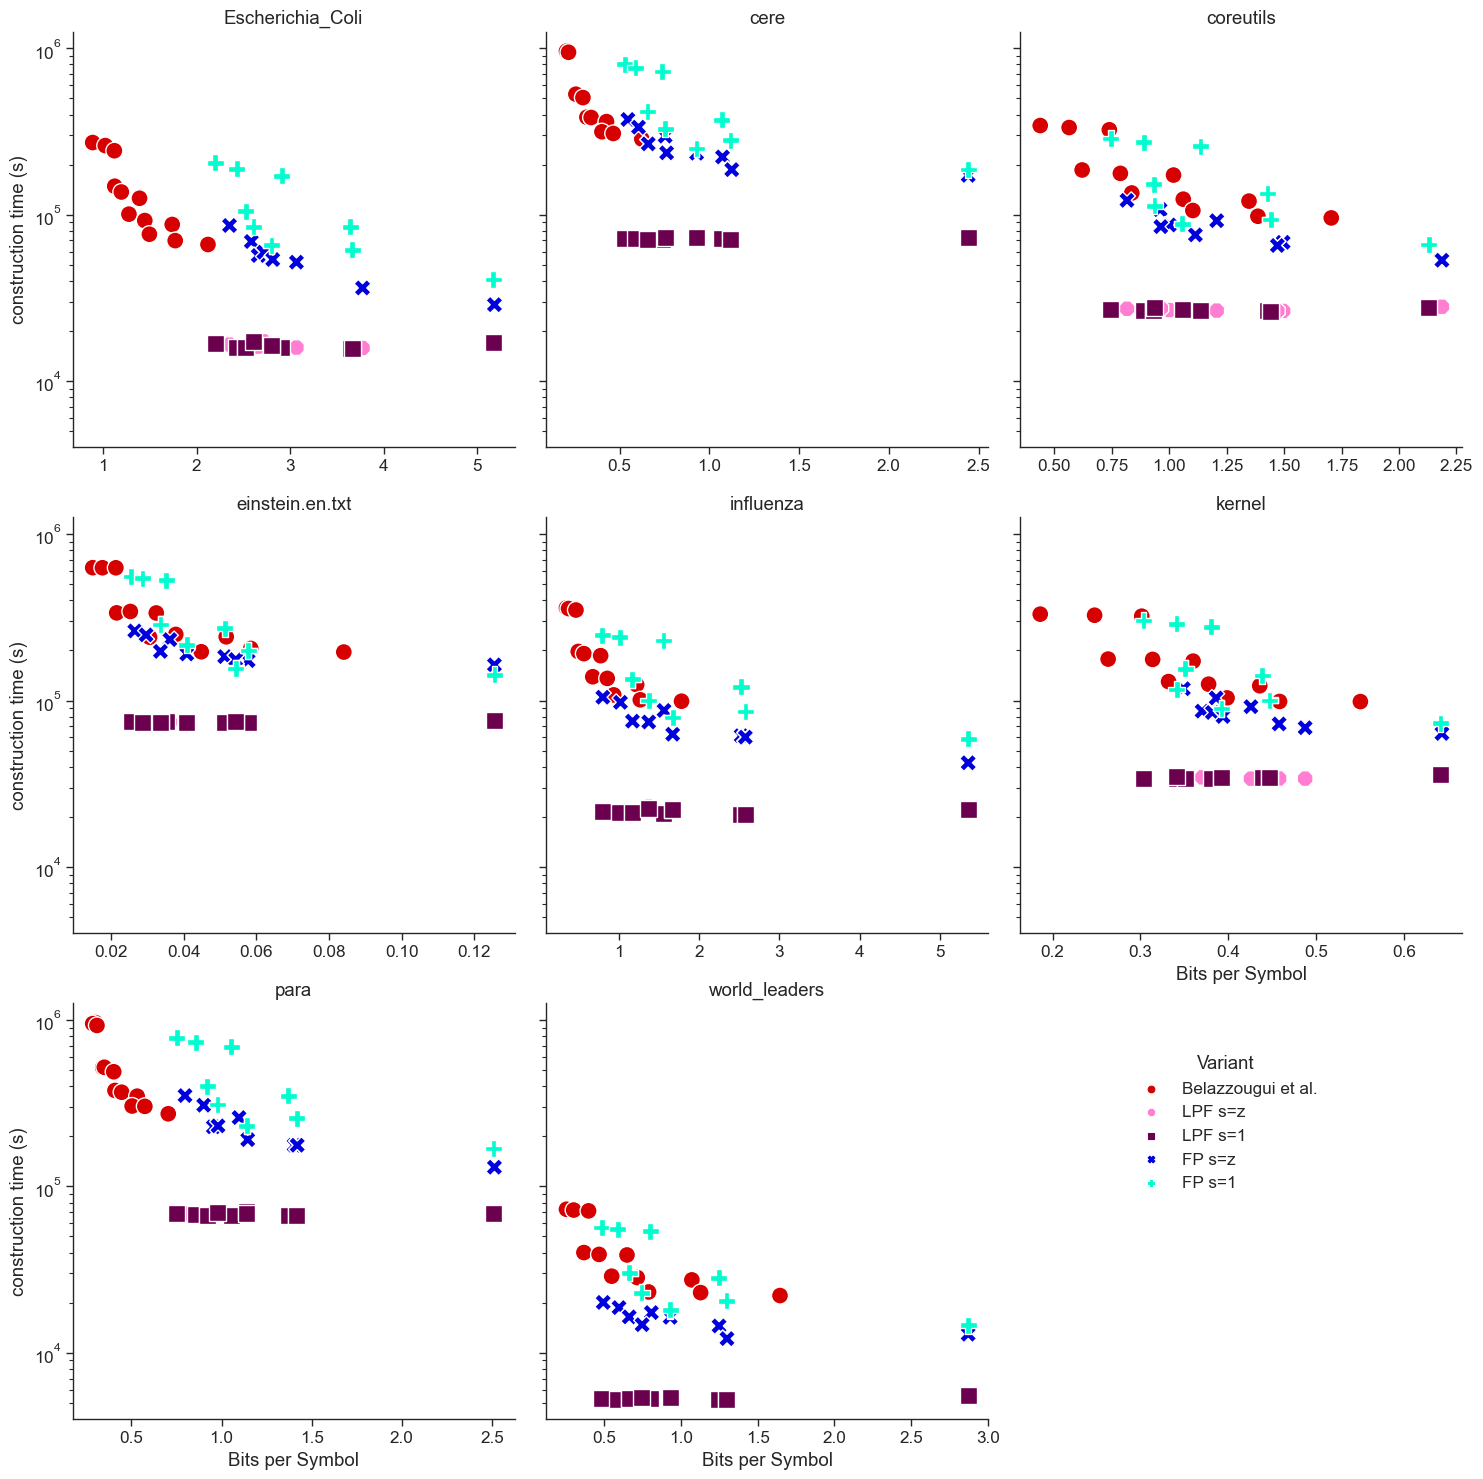

In [4]:
theo_speed_size_log = sns.relplot(y='constr_time', x='bpS', data=theoonly, col='text_id',
                                col_wrap=col_wrapping,palette=pal, hue='name', markers=dfmarkers,style='name',
                                s=150,facet_kws={'sharey': True, 'sharex': False, 'legend_out' : False})
theo_speed_size_log.set_xlabels('Bits per Symbol')
theo_speed_size_log.set_ylabels('construction time (s)')
theo_speed_size_log.set(yscale="log")
theo_speed_size_log.set_titles("{col_name}")
theo_speed_size_log._legend.set_title("Variant")
sns.move_legend(theo_speed_size_log, "upper left", bbox_to_anchor=(0.75, 0.3), frameon=False)
plt.savefig("theo_speed_size_log.pdf")


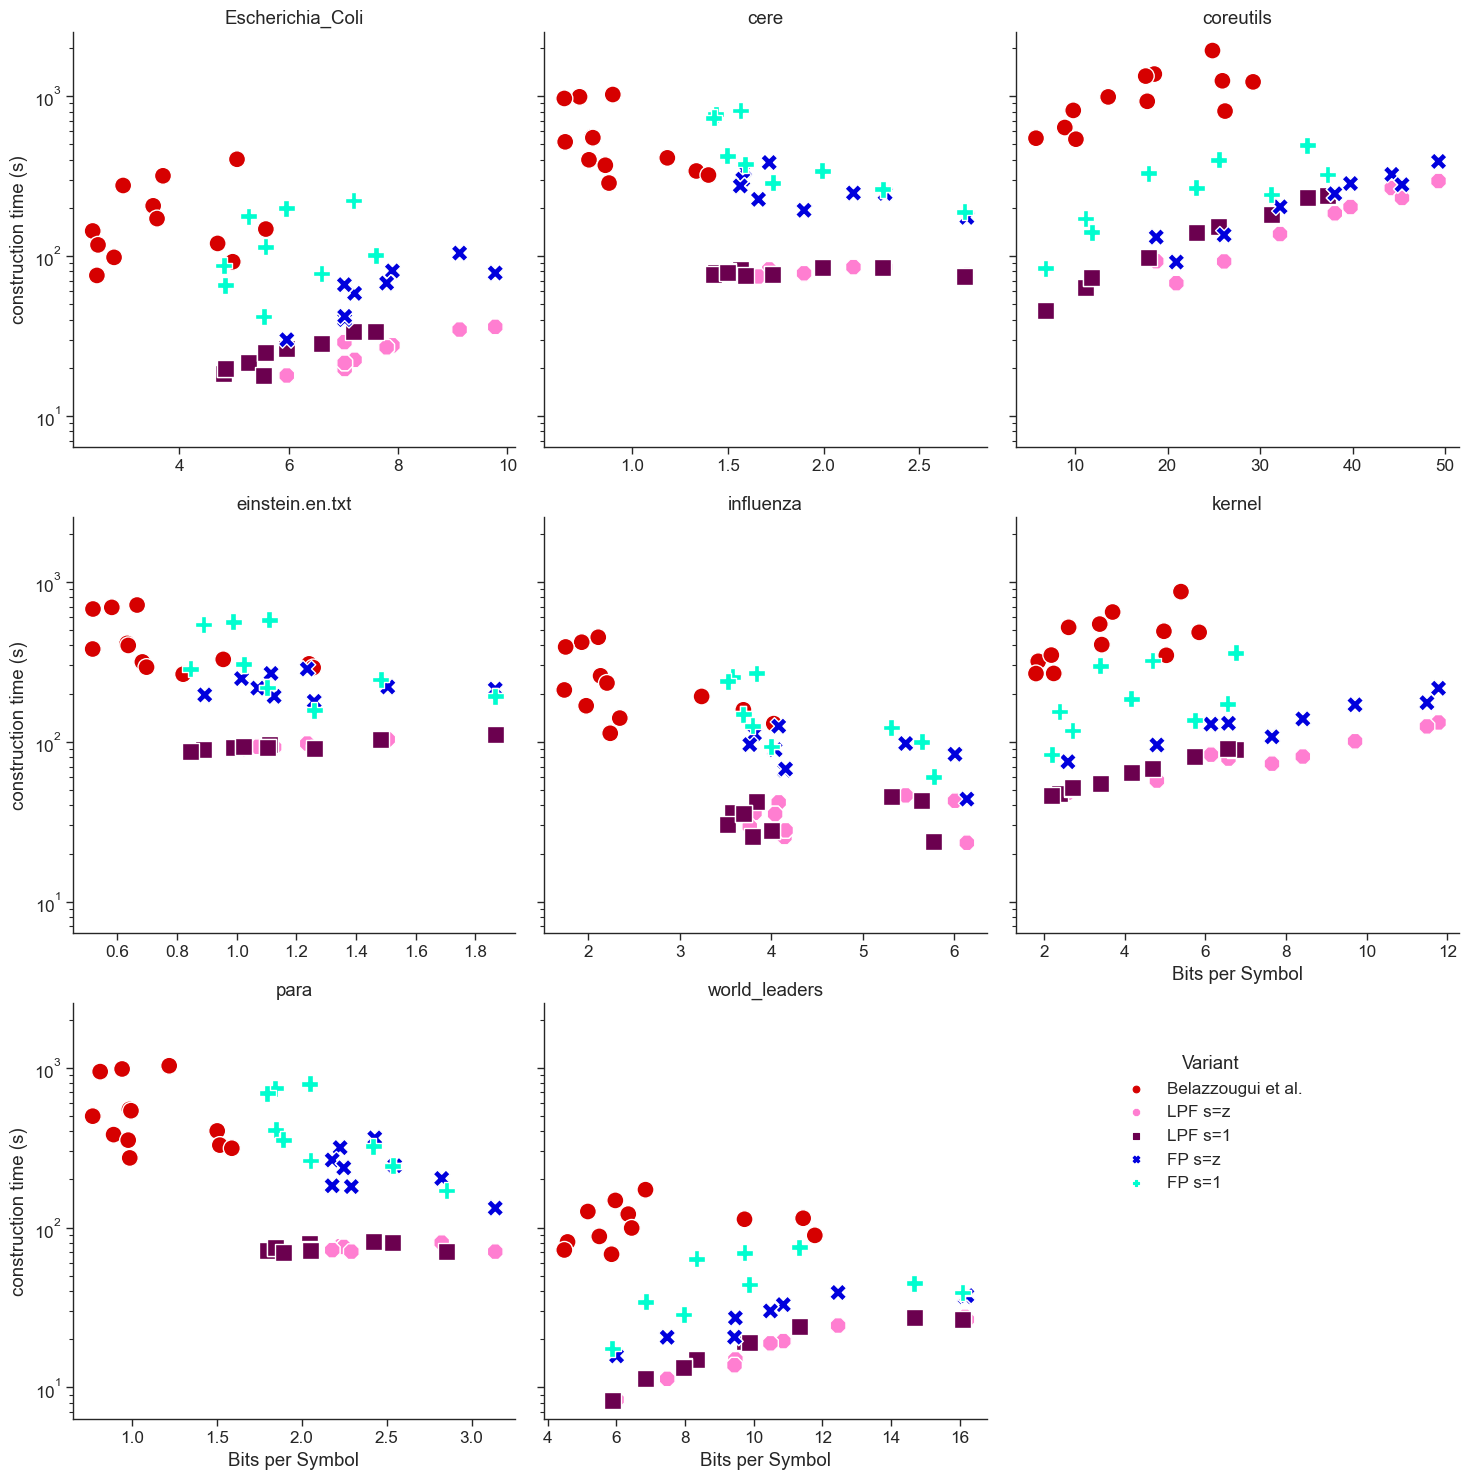

In [5]:
theo_speed_size_log_rs = sns.relplot(y='constr_time_rs', x='bpSrs', data=theoonly, col='text_id',
                            col_wrap=col_wrapping,palette=pal, hue='name', markers=dfmarkers,style='name',
                            s=150,facet_kws={'sharey': True, 'sharex': False, 'legend_out' : False})
theo_speed_size_log_rs.set_xlabels('Bits per Symbol')
theo_speed_size_log_rs.set_ylabels('construction time (s)')
theo_speed_size_log_rs.set(yscale="log")
theo_speed_size_log_rs.set_titles("{col_name}")
theo_speed_size_log_rs._legend.set_title("Variant")
sns.move_legend(theo_speed_size_log_rs, "upper left", bbox_to_anchor=(0.75, 0.3), frameon=False)
plt.savefig("theo_speed_size_log_rs.pdf")

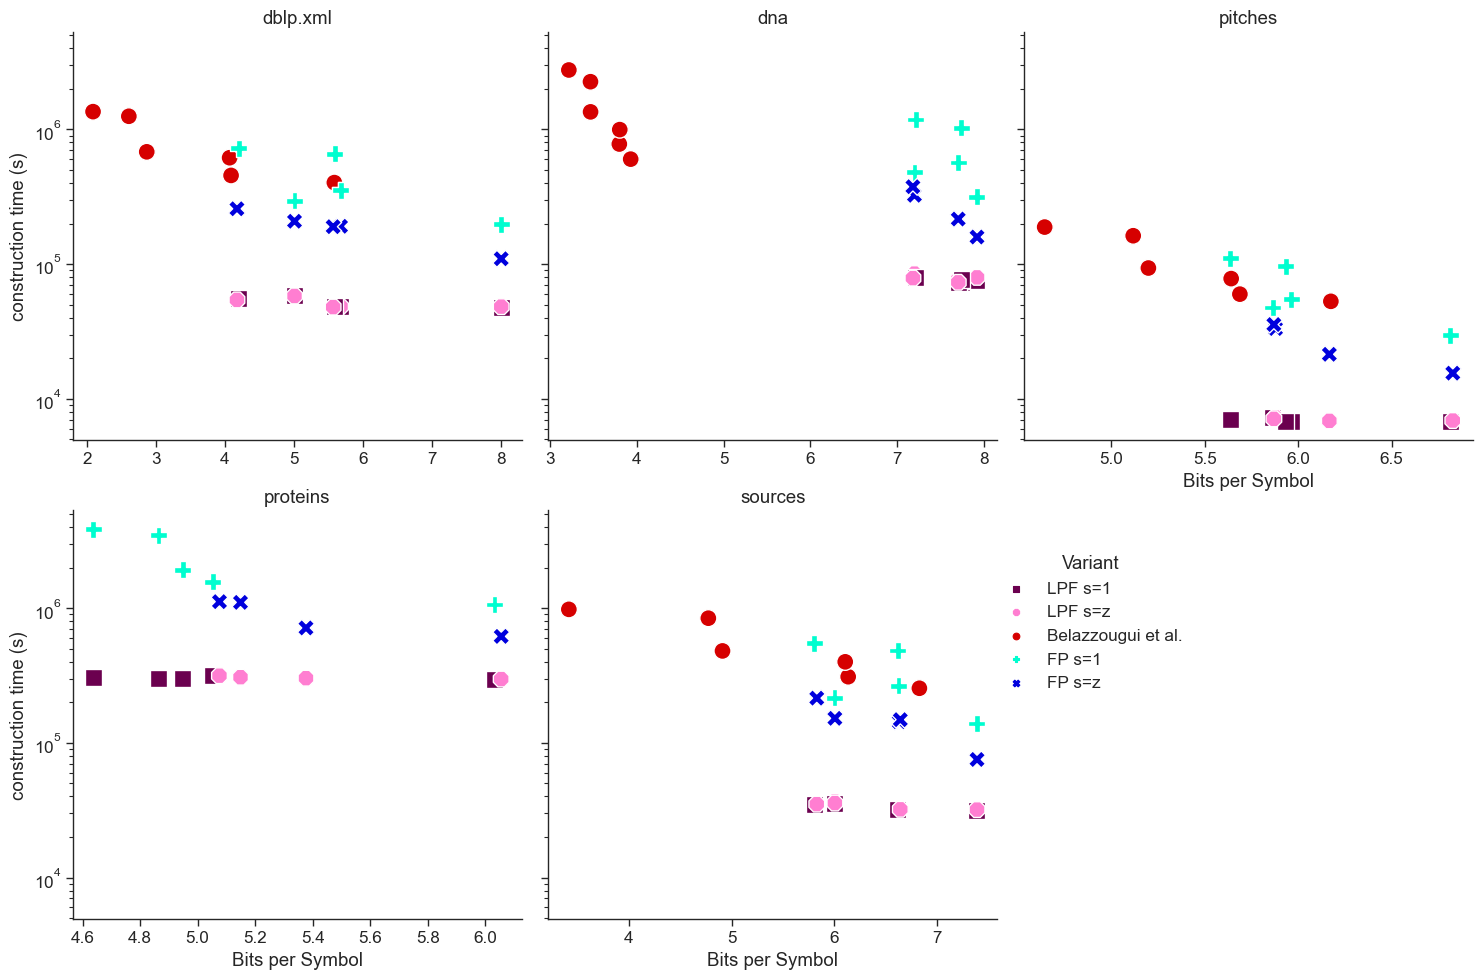

In [6]:
theoonly_nonrep_speed_size_log = sns.relplot(y='constr_time', x='bpS', data=theoonly_nonrep, col='text_id',
                         col_wrap=col_wrapping,palette=pal, hue='name', markers=dfmarkers,style='name', s=150,facet_kws={'sharey': True, 'sharex': False, 'legend_out' : False})
theoonly_nonrep_speed_size_log.set_xlabels('Bits per Symbol')
theoonly_nonrep_speed_size_log.set_ylabels('construction time (s)')
theoonly_nonrep_speed_size_log.set(yscale="log")
theoonly_nonrep_speed_size_log.set_titles("{col_name}")
theoonly_nonrep_speed_size_log._legend.set_title("Variant")
sns.move_legend(theoonly_nonrep_speed_size_log, "upper left", bbox_to_anchor=(0.66, 0.45), frameon=False)
plt.savefig("theoonly_nonrep_speed_size_log.pdf")


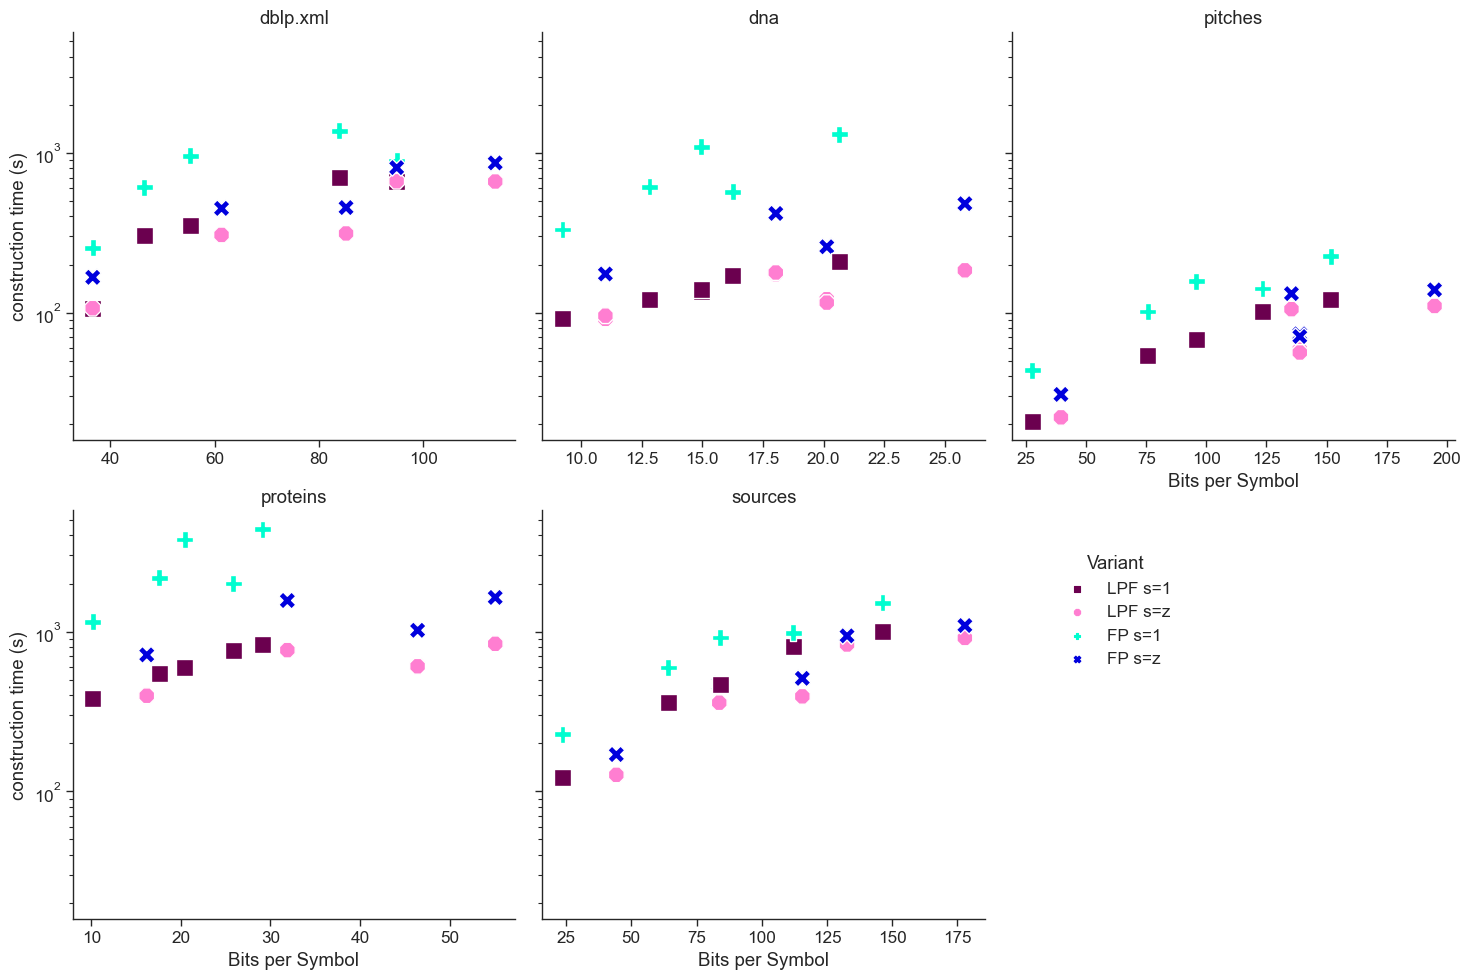

In [7]:
theoonly_nonrep_speed_size_log_rs = sns.relplot(y='constr_time_rs', x='bpSrs', data=theoonly_nonrep_nocomp, col='text_id',
                         col_wrap=col_wrapping,palette=pal, hue='name', markers=dfmarkers,style='name', s=150,facet_kws={'sharey': True, 'sharex': False, 'legend_out' : True})
theoonly_nonrep_speed_size_log_rs.set_xlabels('Bits per Symbol')
theoonly_nonrep_speed_size_log_rs.set_ylabels('construction time (s)')
theoonly_nonrep_speed_size_log_rs.set(yscale="log")
theoonly_nonrep_speed_size_log_rs.set_titles("{col_name}")
theoonly_nonrep_speed_size_log_rs._legend.set_title("Variant")
sns.move_legend(theoonly_nonrep_speed_size_log_rs, "upper left", bbox_to_anchor=(0.66, 0.45), frameon=False)
plt.savefig("theoonly_nonrep_speed_size_log_rs.pdf")

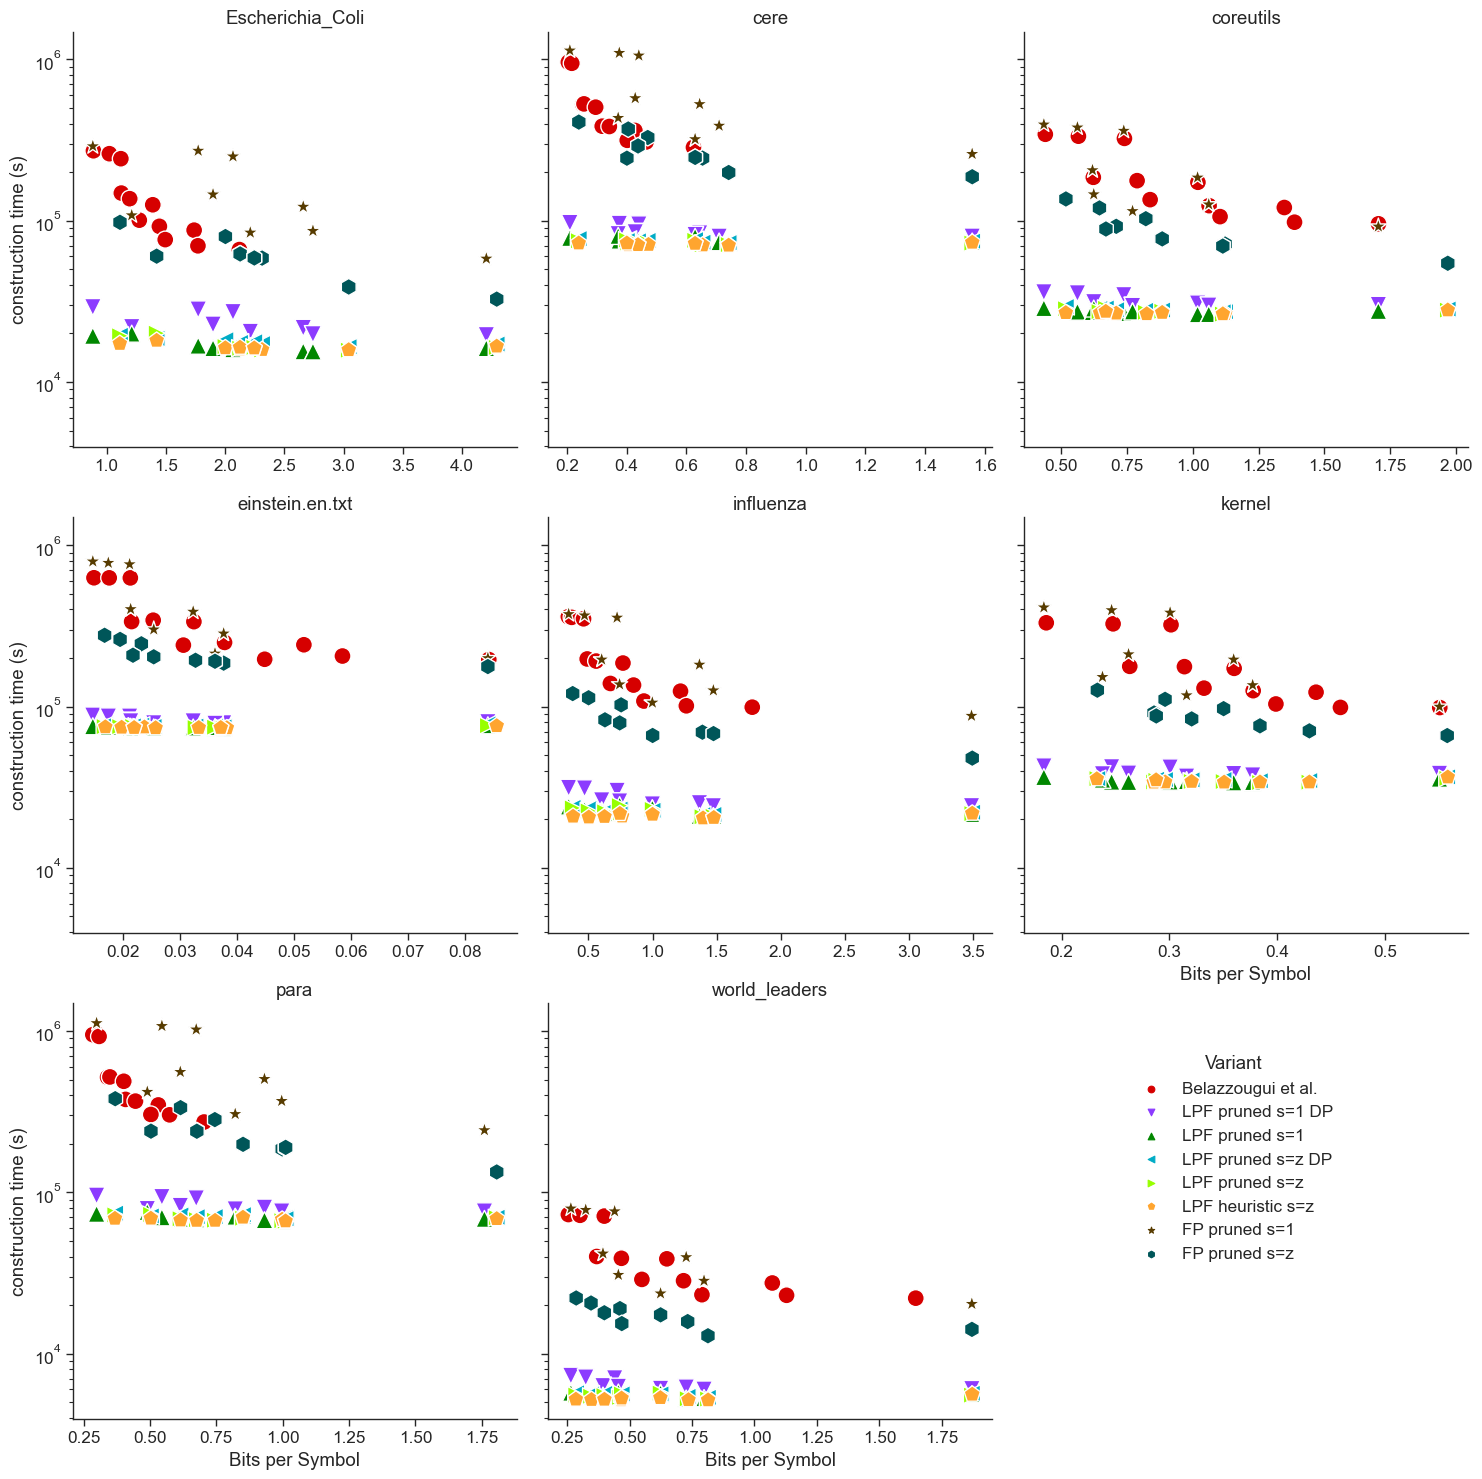

In [8]:
pruned_speed_size_log = sns.relplot(y='constr_time', x='bpS', data=prunedonly, col='text_id',
                                col_wrap=col_wrapping,palette=pal, hue='name', markers=dfmarkers,style='name',
                                s=150,facet_kws={'sharey': True, 'sharex': False, 'legend_out' : False})
pruned_speed_size_log.set_xlabels('Bits per Symbol')
pruned_speed_size_log.set_ylabels('construction time (s)')
pruned_speed_size_log.set(yscale="log")
pruned_speed_size_log.set_titles("{col_name}")
pruned_speed_size_log._legend.set_title("Variant")
sns.move_legend(pruned_speed_size_log, "upper left", bbox_to_anchor=(0.75, 0.3), frameon=False)
plt.savefig("pruned_speed_size_log.pdf")


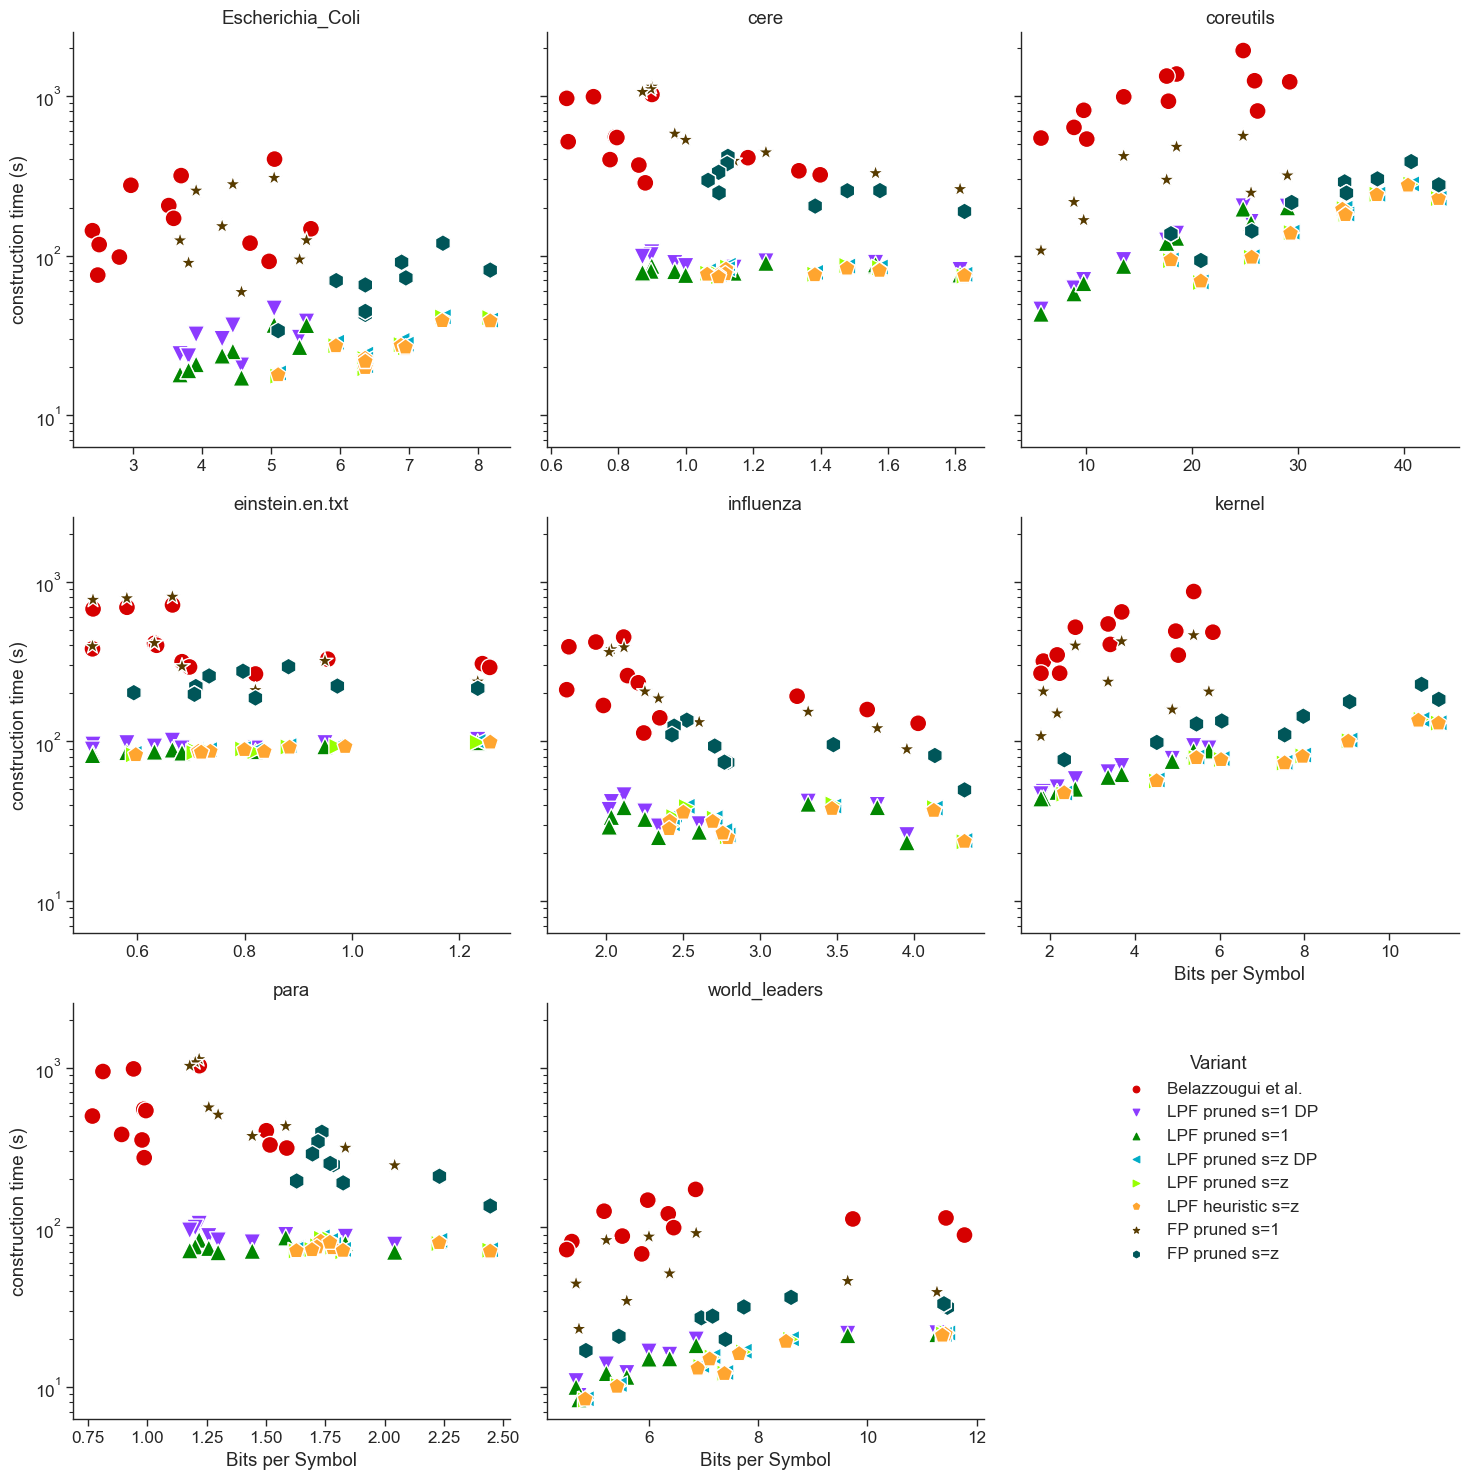

In [9]:
pruned_speed_size_log_rs = sns.relplot(y='constr_time_rs', x='bpSrs', data=prunedonly, col='text_id',
                            col_wrap=col_wrapping,palette=pal, hue='name', markers=dfmarkers,style='name',
                            s=150,facet_kws={'sharey': True, 'sharex': False, 'legend_out' : False})
pruned_speed_size_log_rs.set_xlabels('Bits per Symbol')
pruned_speed_size_log_rs.set_ylabels('construction time (s)')
pruned_speed_size_log_rs.set(yscale="log")
pruned_speed_size_log_rs.set_titles("{col_name}")
pruned_speed_size_log_rs._legend.set_title("Variant")
sns.move_legend(pruned_speed_size_log_rs, "upper left", bbox_to_anchor=(0.75, 0.3), frameon=False)
plt.savefig("pruned_speed_size_log_rs.pdf")

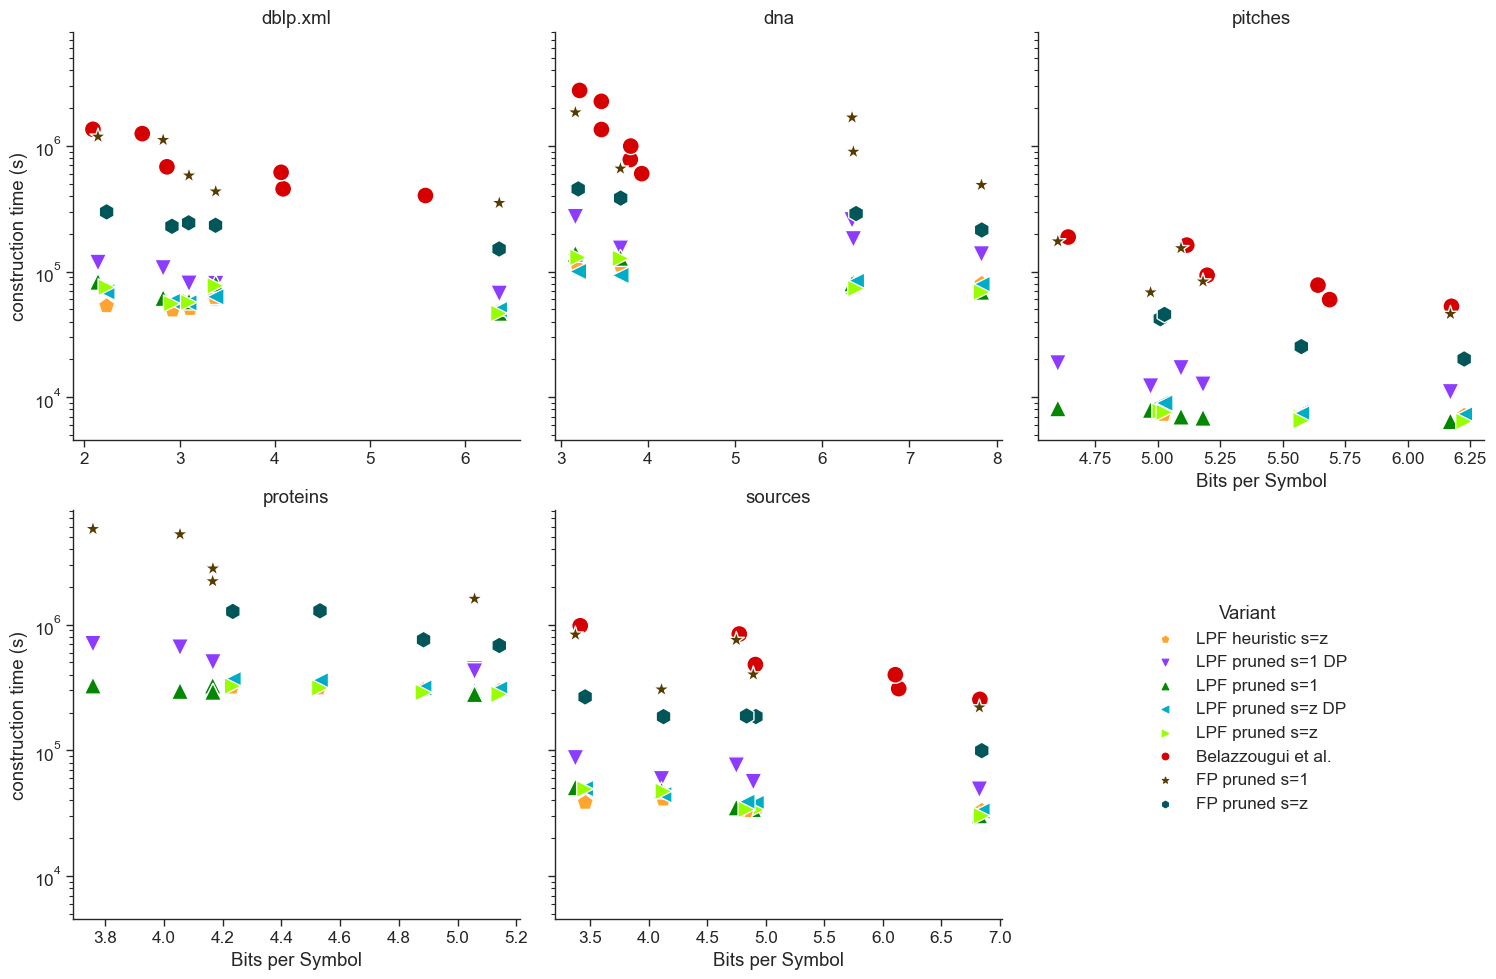

In [10]:
pruned_nonrep_speed_size_log = sns.relplot(y='constr_time', x='bpS', data=prunedonly_nonrep, col='text_id',
                                col_wrap=col_wrapping,palette=pal, hue='name', markers=dfmarkers,style='name',
                                s=150,facet_kws={'sharey': True, 'sharex': False, 'legend_out' : False})
pruned_nonrep_speed_size_log.set_xlabels('Bits per Symbol')
pruned_nonrep_speed_size_log.set_ylabels('construction time (s)')
pruned_nonrep_speed_size_log.set(yscale="log")
pruned_nonrep_speed_size_log.set_titles("{col_name}")
pruned_nonrep_speed_size_log._legend.set_title("Variant")
sns.move_legend(pruned_nonrep_speed_size_log, "upper left", bbox_to_anchor=(0.75, 0.4), frameon=False)
plt.savefig("pruned_nonrep_speed_size_log.pdf")

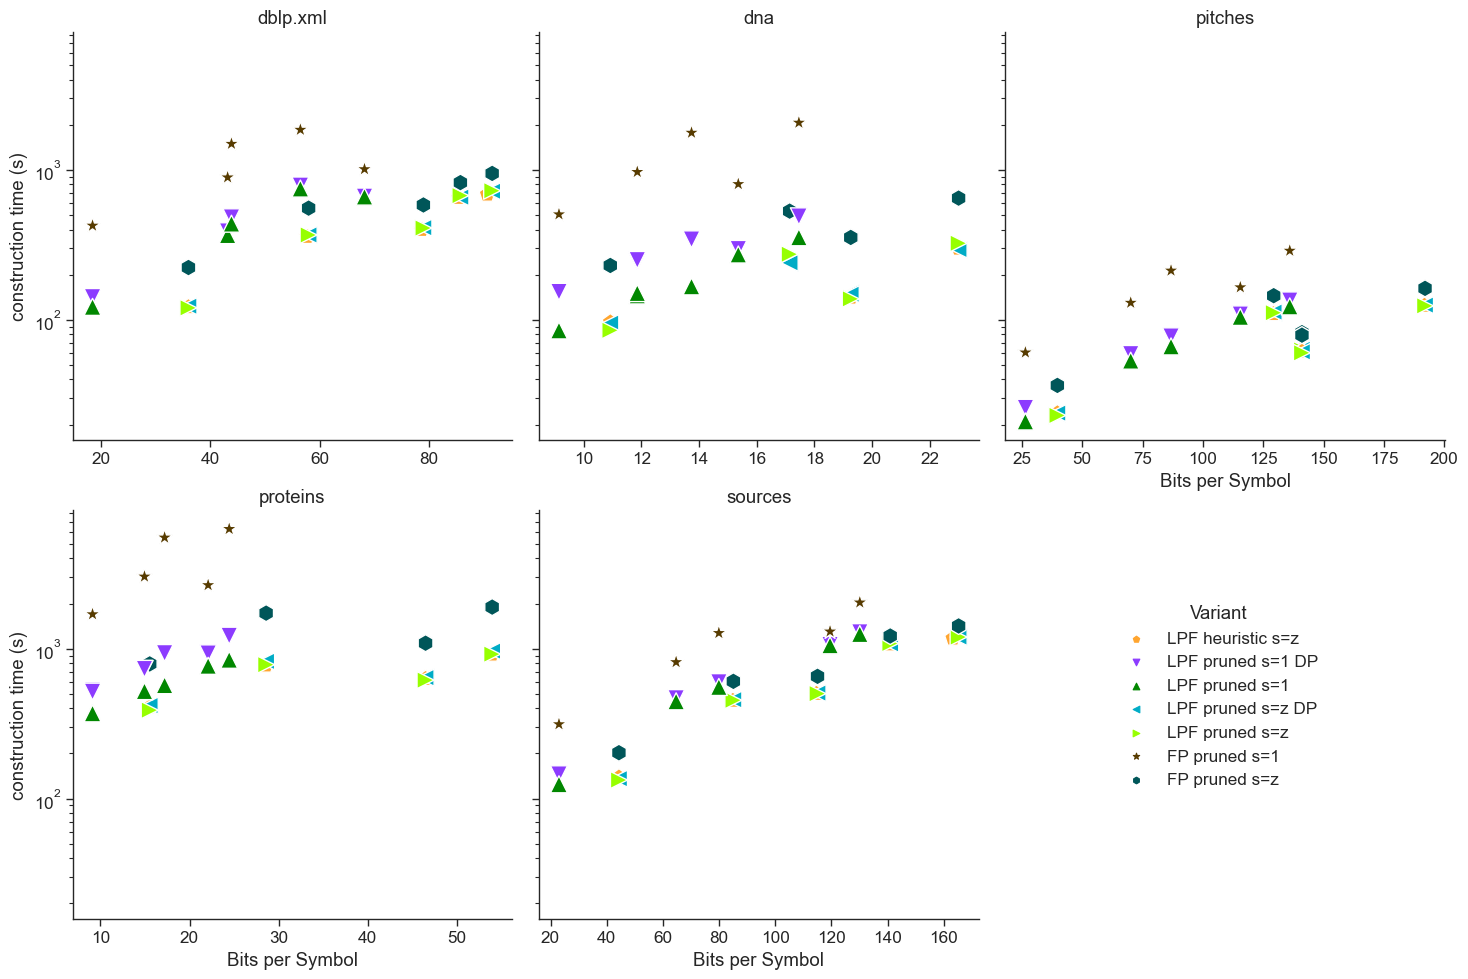

In [11]:
prunedonly_nonrep_speed_size_log_rs = sns.relplot(y='constr_time_rs', x='bpSrs', data=prunedonly_nonrep_nocomp, col='text_id',
                         col_wrap=col_wrapping,palette=pal, hue='name', markers=dfmarkers,style='name', s=150,facet_kws={'sharey': True, 'sharex': False, 'legend_out' : False})
prunedonly_nonrep_speed_size_log_rs.set_xlabels('Bits per Symbol')
prunedonly_nonrep_speed_size_log_rs.set_ylabels('construction time (s)')
prunedonly_nonrep_speed_size_log_rs.set(yscale="log")
prunedonly_nonrep_speed_size_log_rs.set_titles("{col_name}")
prunedonly_nonrep_speed_size_log_rs._legend.set_title("Variant")
sns.move_legend(prunedonly_nonrep_speed_size_log_rs, "upper left", bbox_to_anchor=(0.75, 0.4), frameon=False)
plt.savefig("prunedonly_nonrep_speed_size_log_rs.pdf")

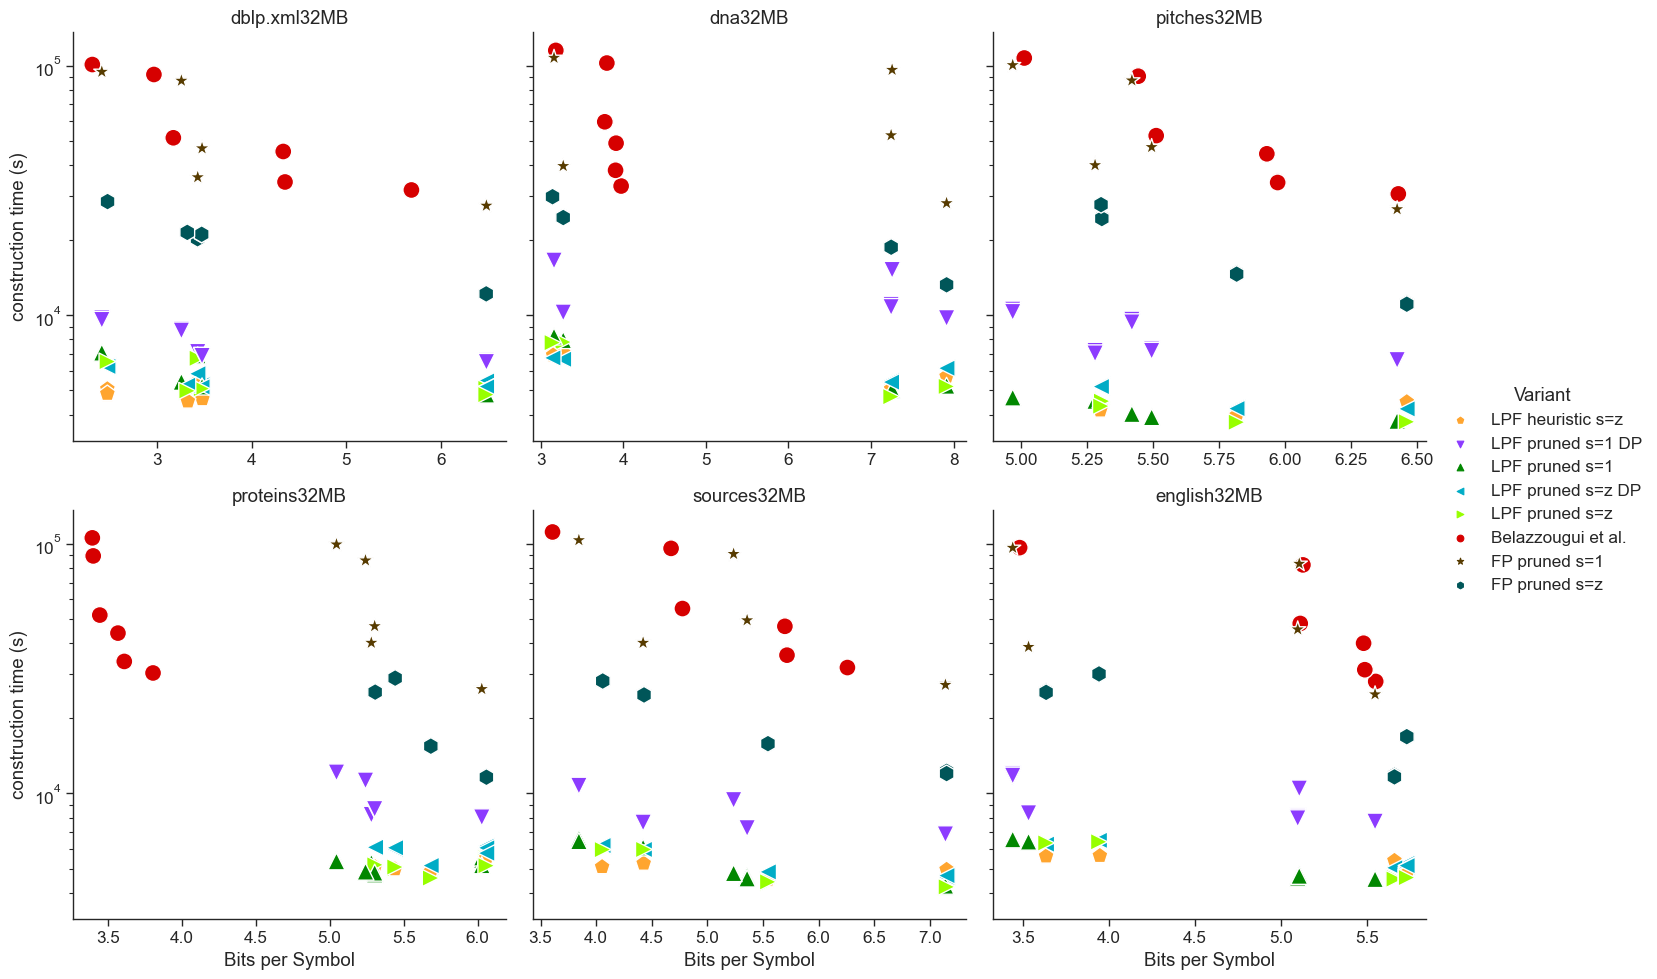

In [12]:
little_nonrep_speed_size_log = sns.relplot(y='constr_time', x='bpS', data=prunedlittle, col='text_id',
                                col_wrap=col_wrapping,palette=pal, hue='name', markers=dfmarkers,style='name',
                                s=150,facet_kws={'sharey': True, 'sharex': False})
little_nonrep_speed_size_log.set_xlabels('Bits per Symbol')
little_nonrep_speed_size_log.set_ylabels('construction time (s)')
little_nonrep_speed_size_log.set(yscale="log")
little_nonrep_speed_size_log.set_titles("{col_name}")
little_nonrep_speed_size_log._legend.set_title("Variant")
plt.savefig("little_nonrep_speed_size_log.pdf")

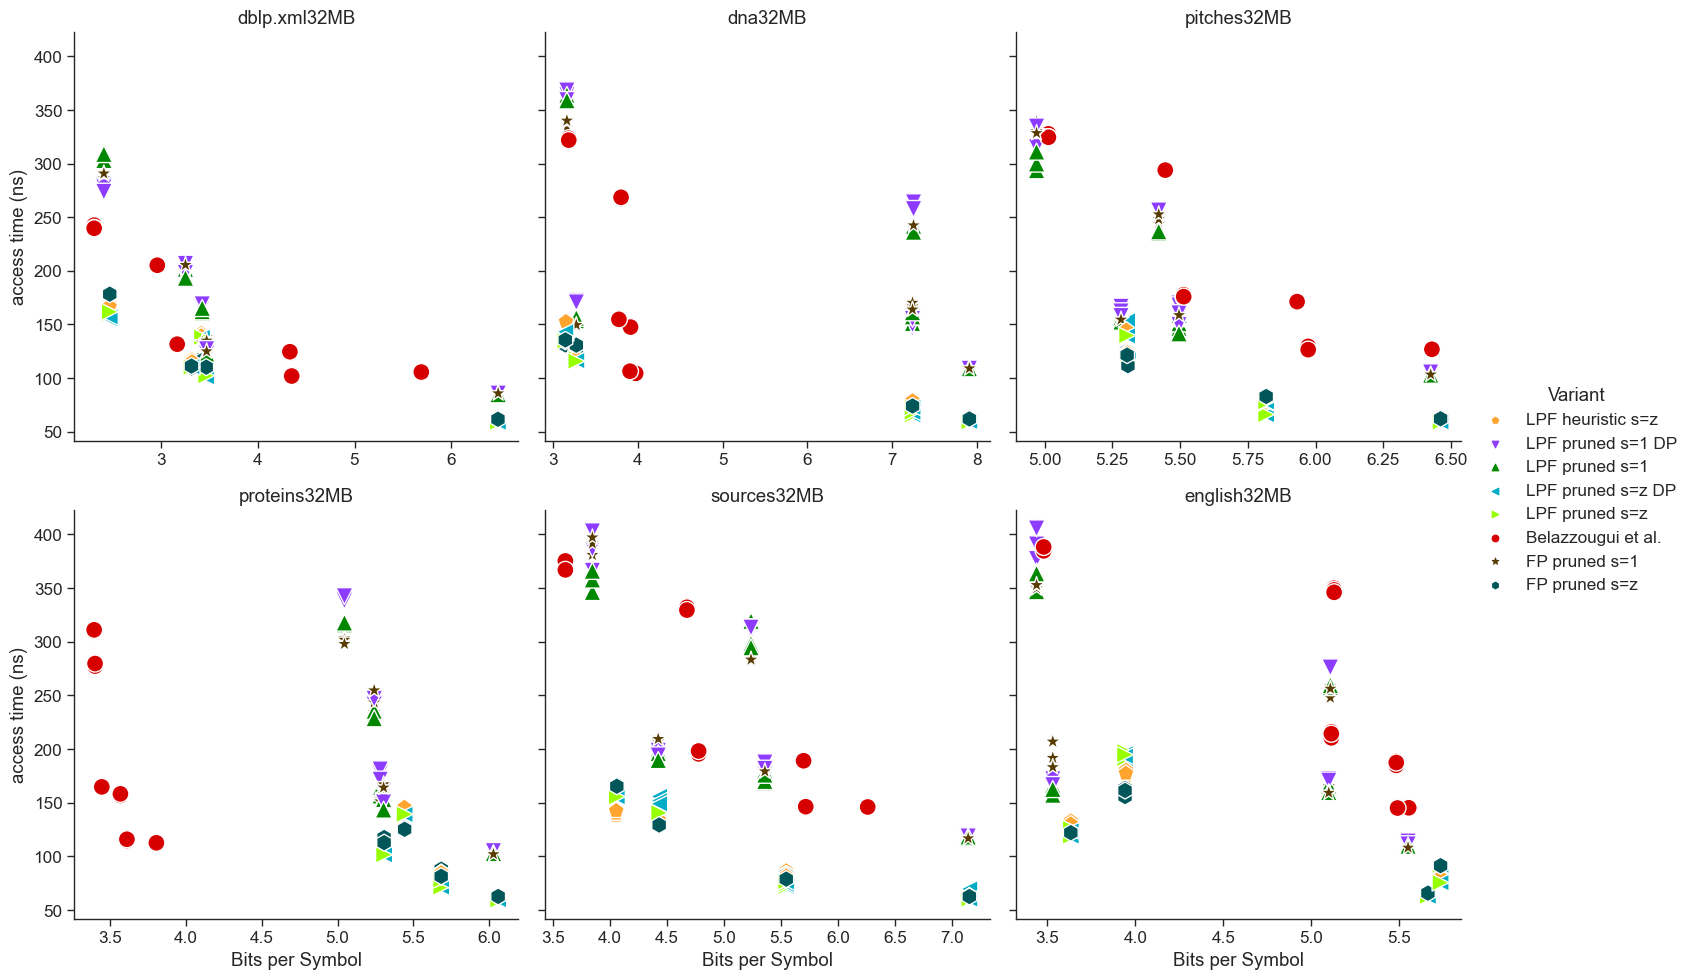

In [13]:
little_nonrep_access_size_log = sns.relplot(y='access_avg', x='bpS', data=prunedlittle, col='text_id',
                                col_wrap=col_wrapping,palette=pal, hue='name', markers=dfmarkers,style='name',
                                s=150,facet_kws={'sharey': True, 'sharex': False})
little_nonrep_access_size_log.set_xlabels('Bits per Symbol')
little_nonrep_access_size_log.set_ylabels('access time (ns)')
little_nonrep_access_size_log.set_titles("{col_name}")
little_nonrep_access_size_log._legend.set_title("Variant")
plt.savefig("little_nonrep_access_size_log.pdf")

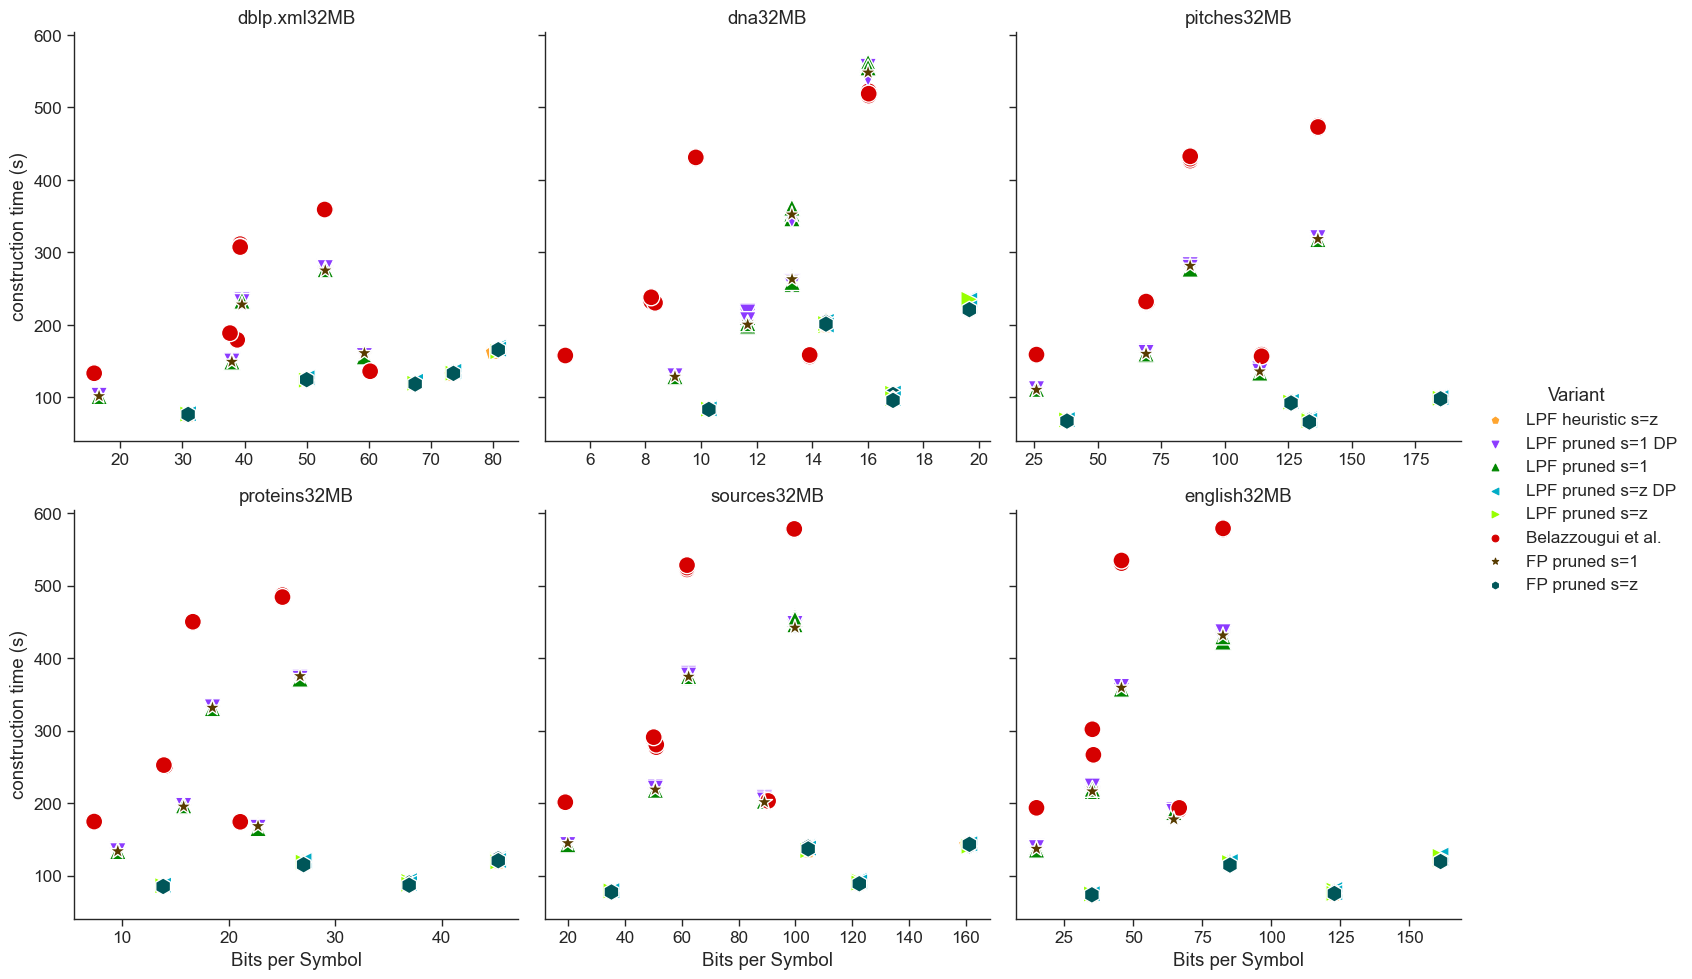

In [14]:
little_nonrep_rank_size_log_rs = sns.relplot(y='rank_avg', x='bpSrs', data=prunedlittle, col='text_id',
                                col_wrap=col_wrapping,palette=pal, hue='name', markers=dfmarkers,style='name',
                                s=150,facet_kws={'sharey': True, 'sharex': False})
little_nonrep_rank_size_log_rs.set_xlabels('Bits per Symbol')
little_nonrep_rank_size_log_rs.set_ylabels('construction time (s)')
little_nonrep_rank_size_log_rs.set_titles("{col_name}")
little_nonrep_rank_size_log_rs._legend.set_title("Variant")
plt.savefig("little_nonrep_rank_size_log_rs.pdf")

In [15]:
maxS = []
minS = []
meanS = []
for t in texts:
    df_t = lpf_time_diff[lpf_time_diff.text_id == t].groupby(['id']).constr_time.agg(['max', 'min', 'count', 'median', 'mean']).transpose()
    df_t = df_t.reset_index()
#     print(df_t)
    df_t['speed_up_s_1'] = df_t[12] / df_t[7]
    maxS.append(df_t['speed_up_s_1'].loc[0])
    minS.append(df_t['speed_up_s_1'].loc[1])
    meanS.append(df_t['speed_up_s_1'].loc[4])

#     print(df_t)
#     print('===========')
print('===========LPF THEO ONLY speed up ===========')
print('max max speed up ' + str(max(maxS)))
print('min max speed up ' + str(min(maxS)))
print('min min speed up ' + str(min(minS)))
print('avg speed up ' + str(0 if len(meanS) == 0 else sum(meanS)/len(meanS)))


NameError: name 'lpf_time_diff' is not defined

In [ ]:
maxS = []
minS = []
meanS = []
for t in texts:
    df_t = fp_time_diff_rs[fp_time_diff_rs.text_id == t].groupby(['id']).constr_time_rs.agg(['max', 'min', 'count', 'median', 'mean']).transpose()
    df_t = df_t.reset_index()
    df_t['speed_up_s_1'] = df_t[12] / df_t[11]
    maxS.append(df_t['speed_up_s_1'].loc[0])
    minS.append(df_t['speed_up_s_1'].loc[1])
    meanS.append(df_t['speed_up_s_1'].loc[4])
#     print(t)
#     print(df_t)
#     print('===========')
print('===========LPF THEO ONLY speed up ===========')
print('max max speed up ' + str(max(maxS)))
print('min max speed up ' + str(min(maxS)))
print('min min speed up ' + str(min(minS)))
print('avg speed up ' + str(0 if len(meanS) == 0 else sum(meanS)/len(meanS)))

In [ ]:
maxS = []
minS = []
meanS = []
for t in texts:
    df_t = fp_time_diff[fp_time_diff.text_id == t].groupby(['id']).constr_time.agg(['max', 'min', 'count', 'median', 'mean']).transpose()
    df_t = df_t.reset_index()
    df_t['speed_up_s_1'] = df_t[12] / df_t[11]
    maxS.append(df_t['speed_up_s_1'].loc[0])
    minS.append(df_t['speed_up_s_1'].loc[1])
    meanS.append(df_t['speed_up_s_1'].loc[4])
#     print(t)
#     print(df_t)
#     print('===========')
print(max(maxS))
print(min(maxS))
print(min(minS))
print(0 if len(meanS) == 0 else sum(meanS)/len(meanS))

In [ ]:
maxS = []
minS = []
meanS = []
for t in texts:
    df_t = lpf_time_diff_rs[lpf_time_diff_rs.text_id == t].groupby(['id']).constr_time_rs.agg(['max', 'min', 'count', 'median', 'mean']).transpose()
    df_t = df_t.reset_index()
    df_t['speed_up_s_1'] = df_t[6] / df_t[7]
    maxS.append(df_t['speed_up_s_1'].loc[0])
    minS.append(df_t['speed_up_s_1'].loc[1])
    meanS.append(df_t['speed_up_s_1'].loc[4])
#     print(t)
#     print(df_t)
#     print('===========')
print(max(maxS))
print(min(maxS))
print(min(minS))
print(0 if len(meanS) == 0 else sum(meanS)/len(meanS))

In [ ]:
maxS = []
minS = []
meanS = []
for t in texts:
    df_t = test_size_diff[test_size_diff.text_id == t].groupby(['id']).bpS.agg(['max', 'min', 'count', 'median', 'mean']).transpose()
    df_t = df_t.reset_index()
    df_t['speed_up_s_1'] = df_t[6] / df_t[7]
    maxS.append(df_t['speed_up_s_1'].loc[0])
    minS.append(df_t['speed_up_s_1'].loc[1])
    meanS.append(df_t['speed_up_s_1'].loc[4])
#     print(t)
#     print(df_t)
#     print('===========')
print(max(maxS))
print(min(maxS))
print(min(minS))
print(0 if len(meanS) == 0 else sum(meanS)/len(meanS))

In [ ]:
# maxS = []
# minS = []
# meanS = []
# for t in texts:
#     df_t = testz[testz.text_id == t].groupby(['id']).bpS.agg(['max', 'min', 'count', 'median', 'mean']).transpose()
#     df_t = df_t.reset_index()
#     df_t['speed_up_s_1'] = df_t[11] / df_t[6]
#     maxS.append(df_t['speed_up_s_1'].loc[0])
#     minS.append(df_t['speed_up_s_1'].loc[1])
#     meanS.append(df_t['speed_up_s_1'].loc[4])
#     print(t)
#     print(df_t)
#     print('===========')
# print(max(maxS))
# print(min(maxS))
# print(min(minS))
# print(0 if len(meanS) == 0 else sum(meanS)/len(meanS))

In [ ]:
maxS = []
minS = []
meanS = []
for t in texts:
    df_t = test[test.text_id == t].groupby(['id']).constr_time.agg(['max', 'min', 'count', 'median', 'mean']).transpose()
    df_t = df_t.reset_index()
    df_t['speed_up_s_1'] = df_t[12] / df_t[7]
    maxS.append(df_t['speed_up_s_1'].loc[0])
    minS.append(df_t['speed_up_s_1'].loc[1])
    meanS.append(df_t['speed_up_s_1'].loc[4])
#     print(t)
# #     print(df_t)
#     print('===========')
print(max(maxS))
print(min(maxS))
print(min(minS))
print(0 if len(meanS) == 0 else sum(meanS)/len(meanS))

In [ ]:
# access_size = sns.relplot(y='access_avg', x='bpS', data=nowave, col='text_id',
#                          col_wrap=col_wrapping,palette=pal, hue='name', markers=dfmarkers,style='name',
#                           s=150,facet_kws={'sharey': True, 'sharex': False,'legend_out' : False})
# access_size.set_xlabels('Bits per Symbol')
# access_size.set_ylabels('access time (ns)')
# access_size.set_titles("{col_name}")
# access_size._legend.set_title("Variant")
# sns.move_legend(access_size, "upper left", bbox_to_anchor=(0.75, 0.3), frameon=False)
# plt.savefig("access_size.pdf")

In [ ]:
# select_size = sns.relplot(y='select_avg', x='bpSrs', data=nowave, col='text_id',
#                          col_wrap=col_wrapping,palette=pal, hue='name', markers=dfmarkers,style='name', s=150,facet_kws={'sharey': True, 'sharex': False})
# select_size.set_xlabels('Bits per Symbol')
# select_size.set_ylabels('select time (ns)')
# select_size.set_titles("{col_name}")
# plt.savefig("select_size.pdf")

In [ ]:
# rank_size = sns.relplot(y='rank_avg', x='bpSrs', data=nowave, col='text_id',
#                          col_wrap=col_wrapping,palette=pal, hue='name', markers=dfmarkers,style='name', s=150,facet_kws={'sharey': True, 'sharex': False})
# rank_size.set_xlabels('Bits per Symbol')
# rank_size.set_ylabels('rank time (ns)')
# rank_size.set_titles("{col_name}")
# plt.savefig("rank_size.pdf")

In [ ]:
prund_speed_size_log_rs = sns.relplot(y='constr_time_rs', x='bpS_rs', data=theoonly, col='text_id',
                         col_wrap=col_wrapping,palette=pal, hue='name', markers=dfmarkers,style='name', s=150,facet_kws={'sharey': True, 'sharex': False, 'legend_out' : False})
theo_speed_size_log.set_xlabels('Bits per Symbol')
theo_speed_size_log.set_ylabels('construction time (s)')
theo_speed_size_log.set(yscale="log")
theo_speed_size_log.set_titles("{col_name}")
theo_speed_size_log._legend.set_title("Variant")
sns.move_legend(theo_speed_size_log, "upper left", bbox_to_anchor=(0.75, 0.3), frameon=False)
plt.savefig("theo_speed_size_log.pdf")

In [ ]:
pruned_speed_size_log = sns.relplot(y='constr_time', x='bpS', data=prunedonly, col='text_id',
                         col_wrap=col_wrapping,palette=pal, hue='name', markers=dfmarkers,style='name', s=100,facet_kws={'sharey': True, 'sharex': False, 'legend_out' : False})
pruned_speed_size_log.set_xlabels('Bits per Symbol')
pruned_speed_size_log.set_ylabels('construction time (s)')
pruned_speed_size_log.set(yscale="log")
pruned_speed_size_log.set_titles("{col_name}")
pruned_speed_size_log._legend.set_title("Variant")
sns.move_legend(pruned_speed_size_log, "upper left", bbox_to_anchor=(0.75, 0.3), frameon=False)
plt.savefig("pruned_speed_size_log.pdf")


In [ ]:
pruned_speed_size_log_rs = sns.relplot(y='constr_time_rs', x='bpSrs', data=prunedonly, col='text_id',
                         col_wrap=col_wrapping,palette=pal, hue='name', markers=dfmarkers,style='name', s=100,facet_kws={'sharey': True, 'sharex': False, 'legend_out' : False})
pruned_speed_size_log_rs.set_xlabels('Bits per Symbol')
pruned_speed_size_log_rs.set_ylabels('construction time (s)')
pruned_speed_size_log_rs.set(yscale="log")
pruned_speed_size_log_rs.set_titles("{col_name}")
pruned_speed_size_log_rs._legend.set_title("Variant")
sns.move_legend(pruned_speed_size_log_rs, "upper left", bbox_to_anchor=(0.75, 0.3), frameon=False)
plt.savefig("pruned_speed_size_log_rs.pdf")

In [ ]:
theo_speed_size_log_rs = sns.relplot(y='constr_time_rs', x='bpSrs', data=theoonly, col='text_id',
                                                  col_wrap=col_wrapping,palette=pal, hue='name', markers=dfmarkers,style='name', s=150,facet_kws={'sharey': True, 'sharex': False, 'legend_out' : False})
theo_speed_size_log_rs.set_xlabels('Bits per Symbol')
theo_speed_size_log_rs.set_ylabels('construction time (s)')
theo_speed_size_log_rs.set(yscale="log")
theo_speed_size_log_rs.set_titles("{col_name}")
theo_speed_size_log_rs._legend.set_title("Variant")
sns.move_legend(theo_speed_size_log_rs, "upper left", bbox_to_anchor=(0.75, 0.3), frameon=False)
plt.savefig("theo_speed_size_log_rs.pdf")

In [ ]:
pruned_speed_size_log = sns.relplot(y='constr_time', x='bpS', data=pruned, col='text_id',
                         col_wrap=col_wrapping,palette=pal, hue='name', markers=dfmarkers,style='name', s=150,facet_kws={'sharey': True, 'sharex': False})
pruned_speed_size_log.set_xlabels('Bits per Symbol')
pruned_speed_size_log.set_ylabels('construction time (ms)')
pruned_speed_size_log.set(yscale="log")
pruned_speed_size_log.set_titles("{col_name}")
plt.savefig("pruned_speed_size_log.pdf")

In [ ]:
pruned_speed_size_log_rs = sns.relplot(y='constr_time_rs', x='bpSrs', data=pruned, col='text_id',
                         col_wrap=col_wrapping,palette=pal, hue='name', markers=dfmarkers,style='name', s=150,facet_kws={'sharey': True, 'sharex': False})
pruned_speed_size_log_rs.set_xlabels('Bits per Symbol')
pruned_speed_size_log_rs.set_ylabels('construction time (ms)')
pruned_speed_size_log_rs.set(yscale="log")
pruned_speed_size_log_rs.set_titles("{col_name}")
plt.savefig("pruned_speed_size_log_rs.pdf")

In [ ]:
theo_speed_access_log = sns.relplot(y='constr_time', x='access_avg', data=theoonly, col='text_id',
                         col_wrap=col_wrapping,palette=pal, hue='name', markers=dfmarkers,style='name', s=150,facet_kws={'sharey': True, 'sharex': False})
theo_speed_access_log.set_xlabels('access time (ns)')
theo_speed_access_log.set_ylabels('construction time (ms)')
theo_speed_access_log.set(yscale="log")
theo_speed_access_log.set_titles("{col_name}")
plt.savefig("theo_speed_access_log.pdf")

In [ ]:
pruned_speed_access_log = sns.relplot(y='constr_time', x='access_avg', data=pruned, col='text_id',
                         col_wrap=col_wrapping,palette=pal, hue='name', markers=dfmarkers,style='name', s=150,facet_kws={'sharey': True, 'sharex': False})
pruned_speed_access_log.set_xlabels('access time (ns)')
pruned_speed_access_log.set_ylabels('construction time (ms)')
pruned_speed_access_log.set(yscale="log")
pruned_speed_access_log.set_titles("{col_name}")
plt.savefig("pruned_speed_access_log.pdf")

In [ ]:
wavelet_speed_access_log = sns.relplot(y='constr_time', x='access_avg', data=df, col='text_id',
                         col_wrap=col_wrapping,palette=pal, hue='name', markers=dfmarkers,style='name', s=150,facet_kws={'sharey': True, 'sharex': False})
wavelet_speed_access_log.set_xlabels('access time (ns)')
wavelet_speed_access_log.set_ylabels('construction time (ms)')
wavelet_speed_access_log.set(yscale="log")
wavelet_speed_access_log.set_titles("{col_name}")
plt.savefig("wavelet_speed_access_log.pdf")

In [ ]:
wavelet_speed_rank_log = sns.relplot(y='constr_time_rs', x='rank_avg', data=df, col='text_id',
                         col_wrap=col_wrapping,palette=pal, hue='name', markers=dfmarkers,style='name', s=150,facet_kws={'sharey': True, 'sharex': False})
wavelet_speed_rank_log.set_xlabels('access time (ns)')
wavelet_speed_rank_log.set_ylabels('construction time (ms)')
wavelet_speed_rank_log.set(yscale="log")
wavelet_speed_rank_log.set_titles("{col_name}")
plt.savefig("wavelet_speed_access_log.pdf")

In [ ]:
wavelet_speed_select_log = sns.relplot(y='constr_time_rs', x='select_avg', data=df, col='text_id',
                         col_wrap=col_wrapping,palette=pal, hue='name', markers=dfmarkers,style='name', s=150,facet_kws={'sharey': True, 'sharex': False})
wavelet_speed_select_log.set_xlabels('access time (ns)')
wavelet_speed_select_log.set_ylabels('construction time (ms)')
wavelet_speed_select_log.set(yscale="log")
wavelet_speed_select_log.set_titles("{col_name}")
plt.savefig("wavelet_speed_access_log.pdf")

In [ ]:
theo_speed_rank_log = sns.relplot(x='constr_time_rs', y='rank_avg', data=theoonly, col='text_id',
                         col_wrap=col_wrapping,palette=pal, hue='name', markers=dfmarkers,style='name', s=150,facet_kws={'sharey': False, 'sharex': False})
theo_speed_rank_log.set_ylabels('access time (ns)')
theo_speed_rank_log.set_xlabels('construction time (ms)')
theo_speed_rank_log.set(xscale="log")
theo_speed_rank_log.set_titles("{col_name}")
plt.savefig("theo_speed_rank_log.pdf")

In [ ]:
theo_speed_rank_log = sns.relplot(x='constr_time_rs', y='select_avg', data=df[(df.id == 0) |(df.id == 11) | (df.id == 12) | (df.id == 6) | (df.id == 7)], col='text_id',
                         col_wrap=col_wrapping,palette=pal, hue='name', markers=dfmarkers,style='name', s=150,facet_kws={'sharey': False, 'sharex': False})
theo_speed_rank_log.set_ylabels('select time (ns)')
theo_speed_rank_log.set_xlabels('construction time (ms)')
theo_speed_rank_log.set(xscale="log")
theo_speed_rank_log.set_titles("{col_name}")
plt.savefig("theo_speed_select_log.pdf")

In [ ]:
theo_speed_size_log_rs = sns.relplot(x='constr_time_rs', y='bpSrs', data=df[(df.id == 0) |(df.id == 11) | (df.id == 12) | (df.id == 6) | (df.id == 7)], col='text_id',
                         col_wrap=col_wrapping,palette=pal, hue='name', markers=dfmarkers,style='name', s=150,facet_kws={'sharey': False, 'sharex': False})
theo_speed_size_log_rs.set_ylabels('Bits per Symbol')
theo_speed_size_log_rs.set_xlabels('construction time (ms)')
theo_speed_size_log_rs.set(xscale="log")
theo_speed_size_log_rs.set_titles("{col_name}")
plt.savefig("theo_speed_size_log_rs.pdf")

In [ ]:
theo_speed_size_log = sns.relplot(x='constr_time', y='bpS', data=df[(df.id == 0) |(df.id == 11) | (df.id == 12) | (df.id == 6) | (df.id == 7)], col='text_id',
                         col_wrap=col_wrapping,palette=pal, hue='name', markers=dfmarkers,style='name', s=150,facet_kws={'sharey': False, 'sharex': False})
theo_speed_size_log.set_ylabels('Bits per Symbol')
theo_speed_size_log.set_xlabels('construction time (ms)')
theo_speed_size_log.set(xscale="log")
theo_speed_size_log.set_titles("{col_name}")
plt.savefig("theo_speed_size_log.pdf")

In [ ]:
theo_size_access = sns.relplot(x='bpS', y='access_avg', data=df[(df.id == 0) |(df.id == 11) | (df.id == 12) | (df.id == 6) | (df.id == 7)], col='text_id',
                         col_wrap=col_wrapping,palette=pal, hue='name', markers=dfmarkers,style='name', s=150,facet_kws={'sharey': False, 'sharex': False})
theo_size_access.set_ylabels('access time (ns)')
theo_size_access.set_xlabels('Bits per Symbol')
theo_size_access.set_titles("{col_name}")
plt.savefig("theo_size_access.pdf")

In [ ]:
theo_size_access = sns.relplot(x='bpSrs', y='select_avg', data=df[(df.id == 0) |(df.id == 11) | (df.id == 12) | (df.id == 6) | (df.id == 7)], col='text_id',
                         col_wrap=col_wrapping,palette=pal, hue='name', markers=dfmarkers,style='name', s=150,facet_kws={'sharey': False, 'sharex': False})
theo_size_access.set_ylabels('select time (ns)')
theo_size_access.set_xlabels('Bits per Symbol')
theo_size_access.set_titles("{col_name}")
plt.savefig("theo_size_select.pdf")

In [ ]:
theo_size_access = sns.relplot(x='bpSrs', y='rank_avg', data=df[(df.id == 0) |(df.id == 11) | (df.id == 12) | (df.id == 6) | (df.id == 7)], col='text_id',
                         col_wrap=col_wrapping,palette=pal, hue='name', markers=dfmarkers,style='name', s=150,facet_kws={'sharey': False, 'sharex': False})
theo_size_access.set_ylabels('rank time (ns)')
theo_size_access.set_xlabels('Bits per Symbol')
theo_size_access.set_titles("{col_name}")
plt.savefig("theo_size_rank.pdf")

In [ ]:
speed_size = sns.relplot(x='constr_time', y='bpS', data=df, col='text_id',
    col_wrap=col_wrapping,palette=pal, hue='name', markers=dfmarkers,style='name', s=150,facet_kws={'sharey': False, 'sharex': False})
speed_size.set_ylabels('Bits per Symbol')
speed_size.set_xlabels('construction time (ms)')


In [ ]:
# df_new = df.copy()
# sns.heatmap(df_new.corr())

In [ ]:
# df
# def draw_heatmap(*args, **kwargs):
#     data = kwargs.pop('data')
#     d = data.pivot(index=args[1], columns=args[0], values=args[2])
#     sns.heatmap(d, **kwargs)
# fg = sns.FacetGrid(df_new, col='text_id', row='id')
# fg.map_dataframe(draw_heatmap, 't', 'l', 'constr_time', cbar=False, square = False)

In [ ]:
que_size = sns.relplot(x='bpS', y='access_avg', data=df, col='text_id', col_wrap=3, hue="id",
                       style="id", s=100,facet_kws={'sharey': False, 'sharex': False})
que_size.set_ylabels('access time (ns)')
que_size.set_xlabels('Bits per Symbol')

In [ ]:
que_size = sns.relplot(x='rank_avg', y='access_avg', data=df, col='text_id', col_wrap=3, hue="id",
                       style="id", s=100,facet_kws={'sharey': False, 'sharex': False})
que_size.set_ylabels('access time (ns)')
que_size.set_xlabels('rank time')

In [ ]:

size_size = sns.relplot(x='constr_time', y='peak_mem', data=df, col='text_id', col_wrap=3,
                        hue="id", style="id", s=100,facet_kws={'sharey': False, 'sharex': False})
size_size.set_ylabels('Peak Heap Allocation (B)')
size_size.set_xlabels('construction time (ms)')


In [ ]:
size_size = sns.relplot(x='constr_time_rs', y='bpSrs', data=df, col='text_id', col_wrap=3,
                        hue="id", style="id", s=100,facet_kws={'sharey': False, 'sharex': False})
speed_size_log.set_ylabels('Bits per Symbol (includes rank)')
speed_size_log.set_xlabels('construction time (ms)')
speed_size_log.set(xscale="log")

In [ ]:
size_size = sns.relplot(x='constr_time_rs', y='bpSrs', data=df, col='text_id', col_wrap=3,
                        hue="id", style="id", s=100,facet_kws={'sharey': False, 'sharex': False})
speed_size_log.set_ylabels('Bits per Symbol (includes rank)')
speed_size_log.set_xlabels('construction time (ms)')

In [ ]:
que_size = sns.relplot(x='bpSrs', y='rank_avg', data=df, col='text_id', col_wrap=3, hue="id",
                       style="id", s=100,facet_kws={'sharey': False, 'sharex': False})
que_size.set_ylabels('rank time (ns)')
que_size.set_xlabels('Bits per Symbol')